Input required libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

Input Dataset and see the first of 5 dataset to check if the data has abnormality

In [ ]:
df = pd.read_csv('datasetBreastCancer.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concavepoints_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


check how big dataset

In [ ]:

print("Data shape is:", df.shape[0], "x", df.shape[1])

Data shape is: 569 x 32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concavepoints_worst        0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Prepare Data, split data to training set and test set, then scaling the data and transform into X_train and X_test

In [ ]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values
le = LabelEncoder()
Y = le.fit_transform(Y)

# Splitting Dataset to Training Set and Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Scaling
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Finding Best Feature**
for computers such amount of data isn't that big, but there can be cases, when dimensional reduction can be important. In this process, using Principal Component Analysis to reduce dimensionality of the data

Text(0, 0.5, 'Cumulative explained variance')

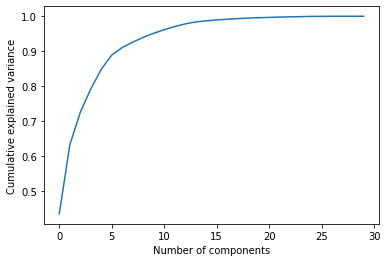

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In plot above we can see that cumulative explained variance is very high near 10 and then it increases very slowly. That means that data describing changes is mostly contained in 10 components. We need to evaluate trade-offs before we choose number of components we use further. I choose 10 to check how it will work as it seems to have most of the data.

In [ ]:
NCOMPONENTS = 10

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transf orm(X_test)
pca_std = np.std(X_pca_train)

print(X_train.shape)
print(X_pca_train.shape)

(455, 30)
(455, 10)


Starting Input Layer and Hidden Layer

In [ ]:
# Initial Input & Hidden Layer
model = Sequential()

# Input Layer and first hidden layer
model.add(Dense(16, activation='relu', kernel_initializer='uniform', input_dim=NCOMPONENTS))

# Adding doptout to avoid overfitting
model.add(Dropout(rate=0.1))

# Add 2nd hidden layer
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

# Adding dropout to avoid overfitting
model.add(Dropout(rate=0.1))

Output Layer

In [ ]:
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Compile Artificial Neural Network

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


Fitting to Training Set

In [ ]:
history = model.fit(X_pca_train, Y_train, batch_size=32, epochs=50, validation_split=0.2,verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 0.6920 - accuracy: 0.6456 - val_loss: 0.6908 - val_accuracy: 0.6044
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6456 - val_loss: 0.6871 - val_accuracy: 0.6154
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.6841 - val_loss: 0.6804 - val_accuracy: 0.6923
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.7830 - val_loss: 0.6680 - val_accuracy: 0.8352
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.8654 - val_loss: 0.6473 - val_accuracy: 0.9341
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6331 - accuracy: 0.9203 - val_loss: 0.6157 - val_accuracy: 0.9560
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.9423 - val_loss: 0.5714 - val_accuracy: 0.9670
Epoch 8/50
12/12 [=

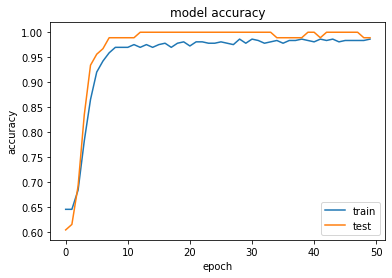

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

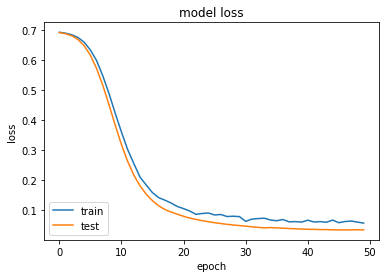

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

Predicting Test

In [ ]:
model.evaluate(X_pca_test, Y_test, verbose=2)

4/4 - 0s - loss: 0.1030 - accuracy: 0.9649 - 19ms/epoch - 5ms/step


[0.10295790433883667, 0.9649122953414917]

In [ ]:
y_pred = model.predict(X_pca_test, verbose=0)
y_pred

array([[9.96610880e-01],
       [3.72110605e-02],
       [2.67302990e-03],
       [1.00144148e-02],
       [1.42893195e-03],
       [3.60426307e-03],
       [1.60360336e-03],
       [1.54376030e-03],
       [7.33762063e-05],
       [2.04536154e-05],
       [6.47856295e-02],
       [5.80473244e-02],
       [2.41667032e-04],
       [6.41692519e-01],
       [4.80377555e-01],
       [9.87940729e-01],
       [3.01378965e-03],
       [9.99906600e-01],
       [9.98961031e-01],
       [9.99998927e-01],
       [9.97143090e-01],
       [9.88284588e-01],
       [9.00006294e-03],
       [3.00765038e-03],
       [9.97457743e-01],
       [1.94904208e-03],
       [1.82390213e-04],
       [9.92637992e-01],
       [2.80115008e-03],
       [9.99962687e-01],
       [3.17424536e-04],
       [9.98815119e-01],
       [1.09014362e-01],
       [9.98273253e-01],
       [2.30810329e-05],
       [9.97771382e-01],
       [1.17583573e-02],
       [9.98144984e-01],
       [9.66089964e-03],
       [9.96503890e-01],


In [ ]:
print(classification_report(Y_test, y_pred.round(), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

